# Linear Regression and Stochastic Gradient Descent

In [8]:
#%pip install palmerpenguins

import sys
sys.path.append("../src")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from rice_ml.linear_regression import SingleNeuron, prepare_data

sns.set_theme()

### Loading and preparing the dataset

Linear regression is a foundational algorithm in machine learning that models the relationship between input features and a continuous target variable by fitting a straight line to the data. It learns coefficients that minimize the mean squared error between predicted and actual values, providing interpretable insights into feature influence. Unlike the perceptron which classifies data into categories, linear regression predicts numeric outcomes.

We will again use the Palmer Penguins dataset is a great fit because of its inclusion of continuous numeric characteristics that have real world biological implications.

In [12]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Now we have an understanding of the Penguins dataset. Each row is an observation of a penguin, as long as some characteristics of that penguin: this includes information about its species, sex, bill legnth, flipper length, etc. Note that continuous numeric characteristics such as bill length and body mass will be of importance for our application in linear regression.

Linear regression find the function that best maps a linear relationship between two variables. Thus, it will be helpful to figure out which characteristics of penguins may have the highest linear correlations so that we can apply our model and achieve useful predictions.

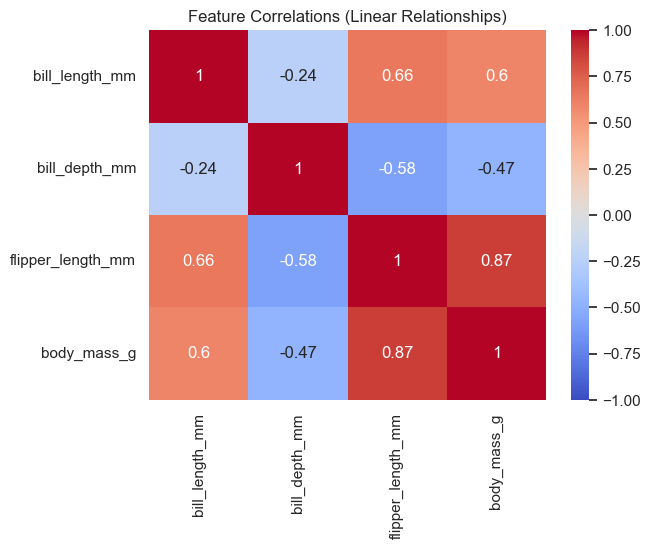

In [13]:
corr = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlations (Linear Relationships)")
plt.show()

From this heatmap, we can see that flipper length (in millimeters) and body mass (in grams) of the penguins in this dataset has a high linear correlation. Thus, we will isolate these two characteristics of penguins for use in our algorithm.